<a href="https://colab.research.google.com/github/shriyakashyap/dogs-v-cats/blob/main/dogs_vs_cats_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

setting up everything

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 153MB/s]
100% 1.06G/1.06G [00:11<00:00, 103MB/s]


importing stuff

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

The datasets have images of different sizes. Using image_dataset_from_directory will make the images the same size, so they are easier to work with.

In [ ]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =  32,
    image_size = (256, 256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =  32,
    image_size = (256, 256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalise

def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

dataset is ready to use!

In [ ]:
#create CNN model

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 87ms/step - loss: 0.7309 - accuracy: 0.6360 - val_loss: 0.6730 - val_accuracy: 0.6316
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.5183 - accuracy: 0.7404 - val_loss: 0.5115 - val_accuracy: 0.7432
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4229 - accuracy: 0.8066 - val_loss: 0.4897 - val_accuracy: 0.7586
Epoch 4/10
625/625 [==============================] - 56s 90ms/step - loss: 0.3413 - accuracy: 0.8487 - val_loss: 0.4762 - val_accuracy: 0.7764
Epoch 5/10
625/625 [==============================] - 58s 91ms/step - loss: 0.2494 - accuracy: 0.8960 - val_loss: 0.5144 - val_accuracy: 0.7940
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1728 - accuracy: 0.9312 - val_loss: 0.6804 - val_accuracy: 0.7760
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1208 - accuracy: 0.9531 - val_loss: 0.9784 - val_accuracy:

plotting a graph to analyse accuracy with each dataset

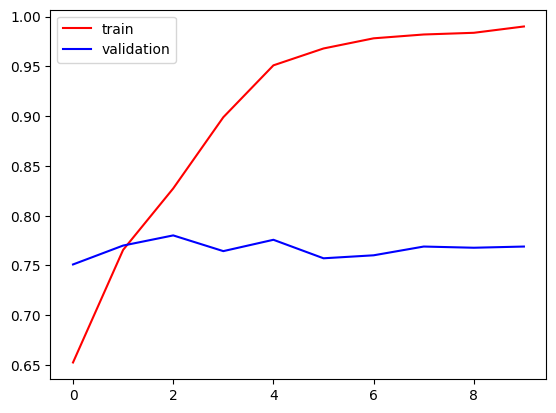

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

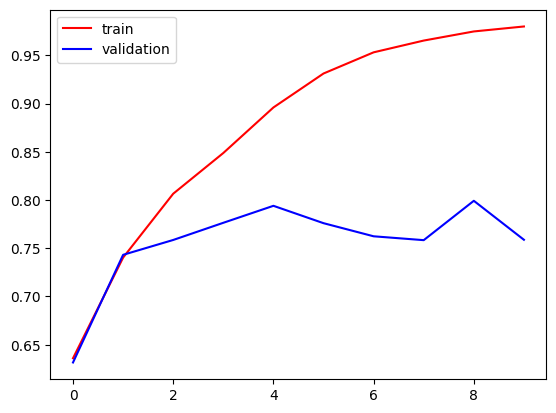

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

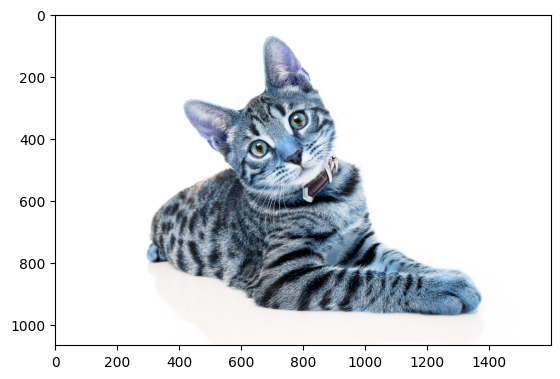

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1067, 1600, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 396ms/step


array([[0.]], dtype=float32)

0 = cat, 1 = dog